# <center>EXPL Project1-1 load digits </center>

# contents
- Import Data
- EDA / shape, target_names, data_DESCR, plotting 0~10 image
- ML / data split, model selection, 평가
- 결론, insight, 후기

--- 
- Purpose of this project: Classifying digit images by using Machine Learning Algorithms
- [scikit-learn digit image data](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html?highlight=load_digits#sklearn.datasets.load_digits)

## 필요 module import

In [141]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(sklearn.__version__)

1.1.3


## 데이터 준비(data load)

In [4]:
digits = load_digits()

In [5]:
# Data Description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 데이터 이해하기: EDA(Exploratory Data Analysis)

#### Feature Data 지정하기

In [6]:
digits_feature = digits.data
print(digits_feature.shape)
digits_feature

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#### Label Data 지정하기

In [12]:
digits_label = digits.target
digits_label

array([0, 1, 2, ..., 8, 9, 8])

#### Target Names 출력해 보기

In [16]:
# feature names and target name
print(digits.feature_names)
print(digits.target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


#### 데이터 Describe 해 보기

In [17]:
# overall data structure
digits_df = pd.DataFrame(digits_feature)
digits_df["label"] = digits.target
digits_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [18]:
# 결측치 확인
print(digits_df.isnull().sum())

0        0
1        0
2        0
3        0
4        0
        ..
60       0
61       0
62       0
63       0
label    0
Length: 65, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

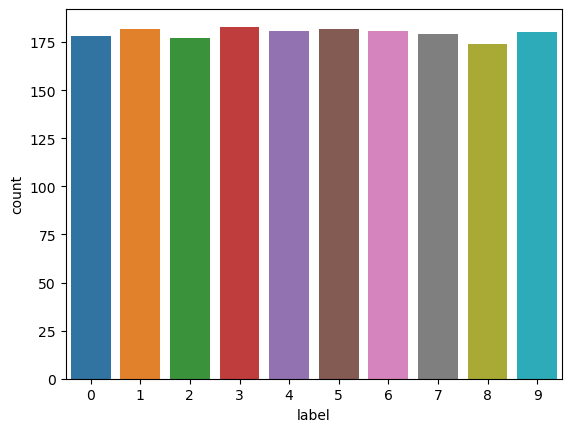

In [19]:
# 참고: EDA for image data: https://dacon.io/en/competitions/official/235896/codeshare/4980 
sns.countplot(data = digits_df, x = 'label')

In [20]:
# checking data distribution by label
digits_df.groupby(by = 'label')['label'].value_counts()

label  label
0      0        178
1      1        182
2      2        177
3      3        183
4      4        181
5      5        182
6      6        181
7      7        179
8      8        174
9      9        180
Name: label, dtype: int64

- countplot으로 확인 결과, image data는 각 숫자별로 160~180개정도로 큰 편차 없이 분포하고 있는 것으로 확인됨
- 가장 많은 숫자 이미지는 3(183개)이며, 가장 적은 숫자 이미지는 8(174개)로 확인됨

In [23]:
digits_feature[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

#### 실제 이미지 plotting

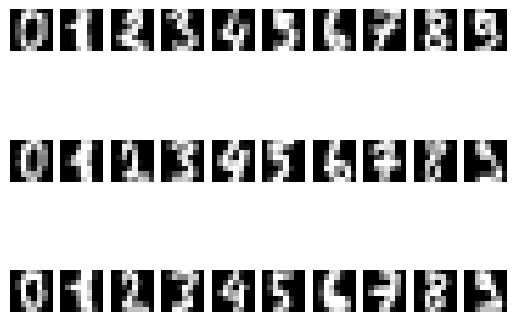

In [26]:
# 실제 이미지 subplot 확인: https://stackoverflow.com/questions/41793931/plotting-images-side-by-side-using-matplotlib
for i in range(len(digits_feature[:30])):
    plt.subplot(3,10,i+1).imshow(digits_feature[i].reshape(8,8), cmap = 'gray')
    plt.axis('off')
plt.show()

## train, test 데이터 분리


In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits_feature, digits_label, train_size=.8, random_state= 42)

## 다양한 모델로 학습시켜보기

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=42) 
print(decision_tree._estimator_type)

classifier


In [29]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_decision_tree

array([6, 9, 3, 7, 2, 1, 5, 3, 5, 7, 2, 7, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 3, 0, 0, 8, 5, 4, 8, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 1, 1, 2, 5, 3, 9, 2, 9, 4, 4, 7, 4, 3, 4, 3, 8, 3, 5, 9, 4, 2,
       7, 7, 4, 7, 1, 9, 2, 7, 3, 3, 2, 6, 9, 4, 0, 7, 5, 7, 5, 8, 7, 5,
       7, 3, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 3, 7, 2, 9, 0, 4, 5, 8, 6, 5, 4, 9, 8, 4, 2, 1, 5,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 3, 2, 5, 6, 9, 9, 4, 4, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 8, 6, 4, 5, 6, 9, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 9, 1, 5,
       5, 1, 4, 4, 8, 8, 7, 9, 7, 0, 2, 8, 2, 3, 2, 9, 1, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 4, 3, 6, 5, 9, 7, 7, 5,
       9, 9, 9, 8, 5, 3, 2, 2, 0, 5, 8, 3, 4, 0, 8,

In [31]:
# accuracy 측정
accuracy_score(y_test, y_pred_decision_tree)

0.8416666666666667

In [32]:
# 예측이 맞으면 0 틀리면 1
y_diff = [1 if (y_test[i] - y_pred_decision_tree[i]) != 0 else 0 for i in range(len(y_test)) ]
print(y_diff)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

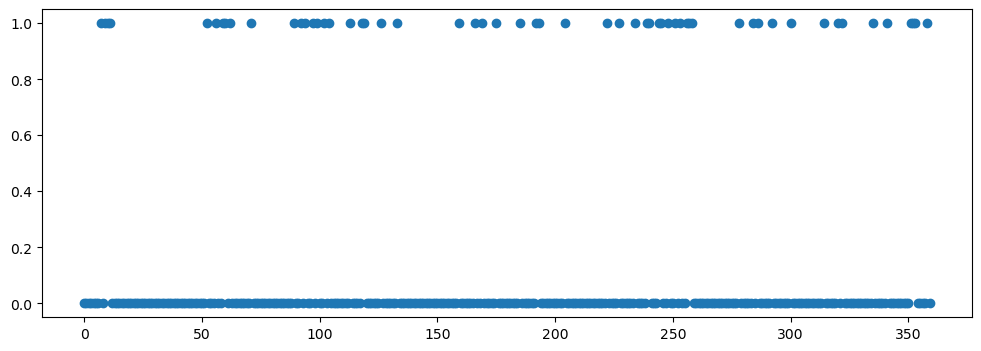

In [33]:
# plotting 결과
plt.figure(figsize = (12,4))
plt.scatter(list(range(len(X_test))), y_diff)

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42) 
print(random_forest._estimator_type)

classifier


In [35]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred_random_forest = random_forest.predict(X_test)
y_pred_random_forest

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 4, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [37]:
# accuracy 측정
accuracy_score(y_test, y_pred_random_forest)

0.9722222222222222

### SVM


In [38]:
from sklearn.svm import SVC

svc = SVC(random_state=42) 
print(svc._estimator_type)

classifier


In [39]:
svc.fit(X_train, y_train)

SVC(random_state=42)

In [40]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 9, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 7, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 5, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [41]:
accuracy_score(y_test, y_pred_svc)

0.9861111111111112

### SGD Classifier

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42) 
print(sgd_classifier._estimator_type)

classifier


In [43]:
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [44]:
y_pred_sgd_classifier = sgd_classifier.predict(X_test)
y_pred_sgd_classifier

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 7, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 6, 7, 5,
       7, 9, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 8, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 1, 5,
       5, 1, 5, 2, 8, 8, 9, 8, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [45]:
accuracy_score(y_test, y_pred_sgd_classifier)

0.9555555555555556

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

logi_regression = LogisticRegression(random_state=42, max_iter=10000) 
print(logi_regression._estimator_type)

classifier


In [47]:
logi_regression.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [48]:
y_pred_logi_regression = logi_regression.predict(X_test)
y_pred_logi_regression

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 3, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 5, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 8, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 2, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 1, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 9, 1, 4, 7, 6, 5, 8, 5,
       5, 1, 5, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [49]:
accuracy_score(y_test, y_pred_logi_regression)

0.9722222222222222

## 모델을 평가해 보기

- 모델을 평가하기 위해서 어떤 지표를 사용할 것인가의 문제는 모델을 사용여 ML을 진행한 결과를 어디에 사용할 것인가에 따라 다를 수 있음
- 여기서는 명확한 용도가 기술되어 있지 않으므로 전체 케이스를 얼마나 맞게 분류했는지를 볼 수 있는 accuracy score와 Recall과 Precision의 두 가지 조화평균으로 이루어진 F1 score을 통해서 모델의 성능을 평가해 보도록 함

In [50]:
from sklearn.metrics import classification_report

In [51]:
y_pred_dict = {}
y_pred_dict['y_pred_decision_tree'] = y_pred_decision_tree
y_pred_dict['y_pred_logi_regression'] = y_pred_logi_regression
y_pred_dict['y_pred_random_forest'] = y_pred_random_forest
y_pred_dict['y_pred_sgd_classifier'] = y_pred_sgd_classifier
y_pred_dict['y_pred_svc'] = y_pred_svc

In [52]:
for k,v in y_pred_dict.items():
    print(k)
    print(classification_report(y_test, v))

y_pred_decision_tree
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.73      0.79        33
           3       0.76      0.85      0.81        34
           4       0.84      0.91      0.87        46
           5       0.89      0.85      0.87        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.75      0.82      0.79        40

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360

y_pred_logi_regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00 

- accuracy와 f1-score확인 결과 svc모델이 가장 좋은 것으로 보임.

# <center>EXPL Project1-2 load wine </center>

## 필요한 module import

In [53]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 데이터 준비

In [54]:
wine = load_wine()

In [55]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## Data 이해하기

### Feature Data 지정하기

In [56]:
wine_feature = wine.data
wine_feature

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [57]:
print('feature names:\n', wine.feature_names, '\n\n shape:',wine_feature.shape)

feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] 

 shape: (178, 13)


### Label Data 지정하기

In [58]:
wine_label = wine.target
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [59]:
print('shape:',wine_label.shape)

shape: (178,)


### Target Names 출력해 보기

In [60]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


### 데이터 Describe 해 보기

In [61]:
colnames = wine.feature_names + ['target']
colnames

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline',
 'target']

In [132]:
wine_df = pd.DataFrame(data = wine_feature, columns=wine.feature_names)
wine_df['target'] = wine_label
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00,0
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00,0
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00,0
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00,0
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.50,95.00,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.00,2
174,13.40,3.91,2.48,23.00,102.00,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.00,2
175,13.27,4.28,2.26,20.00,120.00,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.00,2
176,13.17,2.59,2.37,20.00,120.00,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.00,2


In [133]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


In [134]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [135]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

#### target data distribution

<AxesSubplot:xlabel='target', ylabel='count'>

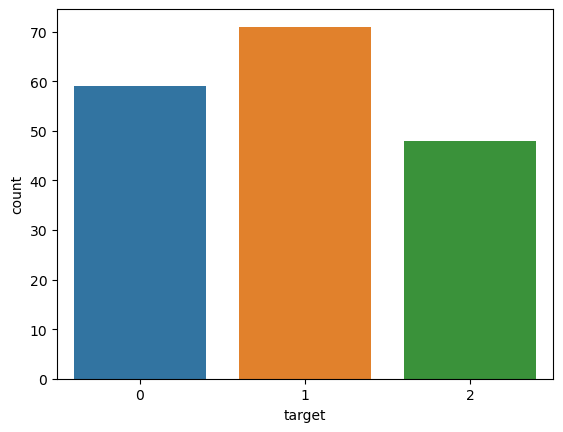

In [136]:
sns.countplot(data =  wine_df, x = 'target')

In [137]:
wine_df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

#### data correlation

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00
1,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00
2,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00
3,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00
4,13.24,2.59,2.87,21.00,118.00,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.50,95.00,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.00
174,13.40,3.91,2.48,23.00,102.00,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.00
175,13.27,4.28,2.26,20.00,120.00,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.00
176,13.17,2.59,2.37,20.00,120.00,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.00


<AxesSubplot:>

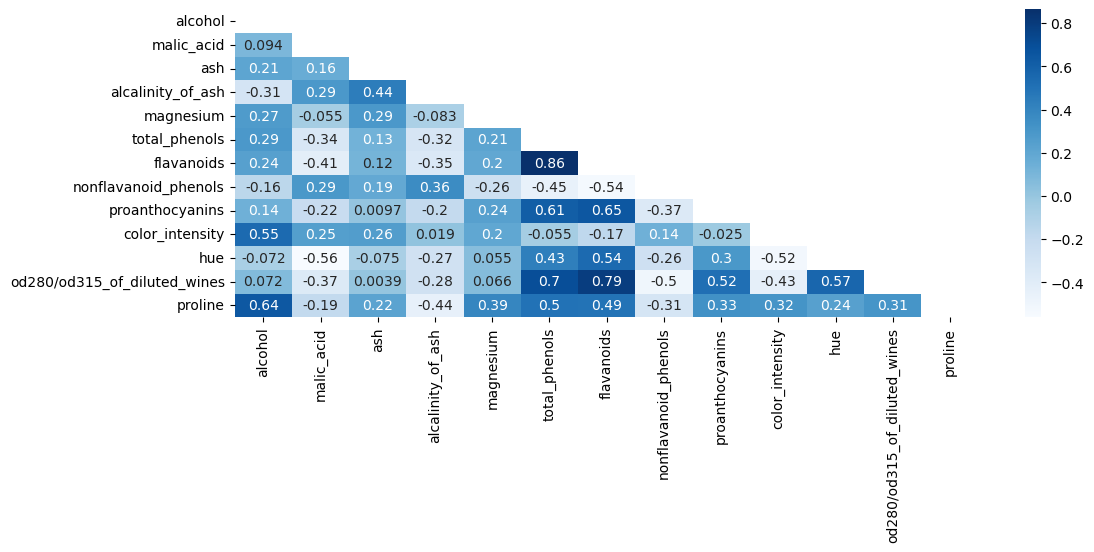

In [167]:
# correlation mask: https://stackoverflow.com/questions/66709299/how-to-mask-the-upper-triangle-of-a-covariance-matrix-in-sns-heatmap-along-with
mask = np.triu(np.ones_like(wine_df.iloc[:,:-1].corr(), dtype=bool))
plt.figure(figsize = (12,4))
sns.heatmap(wine_df.iloc[:,:-1].corr(), cmap='Blues', mask=mask, annot=True)

## train, test 데이터 분리

In [68]:
X_train, X_test, y_train, y_test = train_test_split(wine_feature, wine_label, train_size=0.8, random_state=42)

## 다양한 모델로 학습시켜보기

### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=42) 
print(decision_tree._estimator_type)

classifier


In [70]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_decision_tree

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [72]:
accuracy_score(y_test, y_pred_decision_tree)

0.9444444444444444

### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42) 
print(random_forest._estimator_type)

classifier


In [74]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
y_pred_random_forest = random_forest.predict(X_test)
y_pred_random_forest

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [76]:
accuracy_score(y_test, y_pred_random_forest)

1.0

### SVM

In [77]:
from sklearn.svm import SVC

svc = SVC(random_state=42) 
print(svc._estimator_type)

classifier


In [78]:
svc.fit(X_train, y_train)

SVC(random_state=42)

In [79]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

In [80]:
accuracy_score(y_test, y_pred_svc)

0.8055555555555556

### SGD

In [81]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42, max_iter= 1000) 
print(sgd_classifier._estimator_type)

classifier


In [82]:
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [83]:
y_pred_sgd_classifier = sgd_classifier.predict(X_test)
y_pred_sgd_classifier

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [84]:
accuracy_score(y_test, y_pred_sgd_classifier)

0.7222222222222222

### Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression

# logi_regression = LogisticRegression(random_state=42, max_iter=10000) 
logi_regression = LogisticRegression(random_state=42, max_iter=3000) 
print(logi_regression._estimator_type)

classifier


In [148]:
logi_regression.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=42)

In [149]:
y_pred_logi_regression = logi_regression.predict(X_test)
y_pred_logi_regression

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [150]:
accuracy_score(y_test, y_pred_logi_regression)

0.956140350877193

## 모델을 평가해보기

In [89]:
from sklearn.metrics import classification_report

In [152]:
y_pred_dict = {}
y_pred_dict['y_pred_decision_tree'] = y_pred_decision_tree
y_pred_dict['y_pred_logi_regression'] = y_pred_logi_regression
y_pred_dict['y_pred_random_forest'] = y_pred_random_forest
y_pred_dict['y_pred_sgd_classifier'] = y_pred_sgd_classifier
y_pred_dict['y_pred_svc'] = y_pred_svc

In [153]:
for k,v in y_pred_dict.items():
    print(k)
    print(classification_report(y_test, v))

y_pred_decision_tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

y_pred_logi_regression
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

y_pred_random_forest
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted 

- SGD와 SVC에서 좋지 않게 파악되며 이에 따라 f1 score도 낮게 나오는 것을 볼 수 있음
- 특히 SGD모델에서 2번에 대하여 precision과 recall값이 0으로 나온다는 점을 알 수 있음, 위의 경고도 이에 따른 결과인 것으로 보임
- 반명 logistic regression classifier에서는 매우 우수한 성능을 보이는 것으로 보임. 그러나 1.0의 정확도를 보인 만큼 과적합에 대한 우려가 있을지 추가적이 확인이 필요해 보임, max_iter를 10,000에서 3,000으로 줄였을 때 해당 모델은 precision과 recall에서 불안한 수치를 보임.

# <center>EXPL Project1-3 load breast cancer </center>

## 필요한 module import

In [92]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## data 준비

In [93]:
cancer = load_breast_cancer()

In [94]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Data 이해하기

### Feature Data 지정하기

In [95]:
cancer_feature = cancer.data
cancer_feature

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

### Label Data 지정하기

In [168]:
cancer_label = cancer.target
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Target Names 출력해보기

In [169]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### Data Decribe 해보기

In [170]:
print(cancer.feature_names)
print(cancer_feature.shape, cancer_label.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30) (569,)


In [171]:
cancer_df = pd.DataFrame(cancer_feature, columns=cancer.feature_names)
cancer_df['target'] = cancer_label
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,0.06,...,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07,0
565,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,0.06,...,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07,0
566,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,0.06,...,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08,0
567,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,0.07,...,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12,0


In [172]:
# describe 자리수 변경 option: https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output
pd.set_option('display.float_format', lambda x: '%.2f' % x)
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [173]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [174]:
cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [184]:
len(list(cancer_df.columns[:-1]))

30

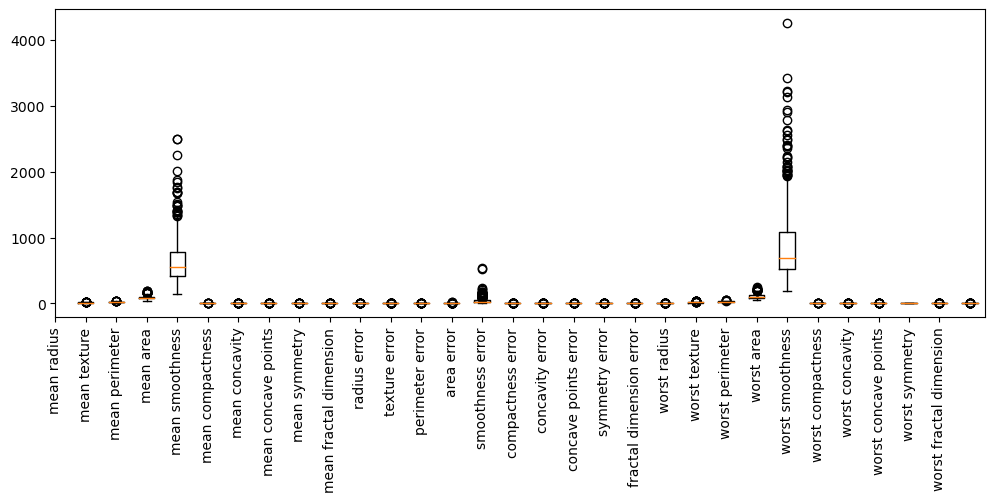

In [194]:
plt.figure(figsize = (12,4))
plt.boxplot(cancer_df.iloc[:,:-1])
plt.xticks(ticks = np.arange(30), labels = list(cancer_df.columns[:-1]), rotation = 90)
plt.show()

- 4번(mean smoithness), 14번(smoothness error), 23번(worst area), 그리고 24번(worst smoothness)에서 outlier가 있는 것으로 보임.

## train, test 데이터 분리

In [195]:
X_train, X_test, y_train, y_test = train_test_split(cancer_feature, cancer_label, train_size=0.8, random_state=42)

## 다양한 모델로 학습시켜보기

### Decision Tree

In [196]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier(random_state=42) 
print(decision_tree._estimator_type)

classifier


In [197]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [198]:
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_decision_tree

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

In [199]:
accuracy_score(y_test, y_pred_decision_tree)

0.9473684210526315

### Random Forest

In [200]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42) 
print(random_forest._estimator_type)

classifier


In [201]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [202]:
y_pred_random_forest = random_forest.predict(X_test)
y_pred_random_forest

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### SVM

In [203]:
from sklearn.svm import SVC

svc = SVC(random_state=42) 
print(svc._estimator_type)

classifier


In [204]:
svc.fit(X_train, y_train)

SVC(random_state=42)

In [205]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [206]:
accuracy_score(y_test, y_pred_svc)

0.9473684210526315

### SGD Classifier

In [207]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42, max_iter= 1000) 
print(sgd_classifier._estimator_type)

classifier


In [208]:
sgd_classifier.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [209]:
y_pred_sgd_classifier =  sgd_classifier.predict(X_test)
y_pred_sgd_classifier

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [210]:
accuracy_score(y_test, y_pred_sgd_classifier)

0.9035087719298246

### Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression

logi_regression = LogisticRegression(random_state=42, max_iter=10000) 
print(logi_regression._estimator_type)

classifier


In [212]:
logi_regression.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [213]:
y_pred_logi_regression = logi_regression.predict(X_test)
y_pred_logi_regression

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [214]:
accuracy_score(y_test, y_pred_logi_regression)

0.956140350877193

## 모델을 평가해보기

In [1]:
y_pred_dict = {}
y_pred_dict['y_pred_decision_tree'] = y_pred_decision_tree
y_pred_dict['y_pred_logi_regression'] = y_pred_logi_regression
y_pred_dict['y_pred_random_forest'] = y_pred_random_forest
y_pred_dict['y_pred_sgd_classifier'] = y_pred_sgd_classifier
y_pred_dict['y_pred_svc'] = y_pred_svc

NameError: name 'y_pred_decision_tree' is not defined

In [215]:
for k,v in y_pred_dict.items():
    print(k)
    print(classification_report(y_test, v))

y_pred_decision_tree
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

y_pred_logi_regression
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

y_pred_random_forest
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted 

- 모델들 중 random forest가 전반적으로 가장 우수한 성능을 보이는 것으로 평가됨
- svc모델은 precision과 recall에서 다소 불안한 모습을 보였으며, sgd는 다른 모델에 비해 전반적으로 좋지 않은 성능을 보인 것으로 평가할 수 있음